In [2]:
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="muted")

### Упражнение 1 (рисуем ЗБЧ)

__Давайте нарисуем ЗБЧ.__ Мы знаем, что математическое ожидание игральной кости это $3.5$. Сделаем симуляцию: 

* подкинем кость 1 раз, посчитаем среднее число на ней
* подкинем кость 2 раза, посчитаем среднее число на ней

.....

* подкинем кость 100 раз, посчитаем среднее число на ней

Построим картинку для всех этих средних и убедимся в том, что оно и правда сходится к $3.5$. Будем всё делать в `numpy`. Никаких циклов!

In [3]:
np.arange(1, 7)

array([1, 2, 3, 4, 5, 6])

In [4]:
x = np.random.choice(np.arange(1, 7), size=10000, replace=True)
x

array([5, 2, 3, ..., 5, 1, 1])

In [5]:
np.cumsum(x)

array([    5,     7,    10, ..., 34882, 34883, 34884])

In [6]:
np.arange(1, x.size + 1)

array([    1,     2,     3, ...,  9998,  9999, 10000])

In [7]:
x_mean = np.cumsum(x)/np.arange(1, x.size + 1)
x_mean

array([5.        , 3.5       , 3.33333333, ..., 3.48889778, 3.48864886,
       3.4884    ])

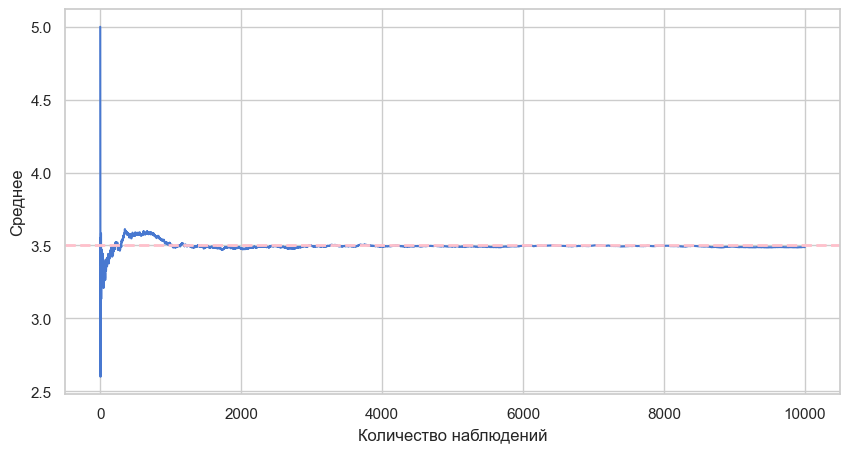

In [8]:
plt.figure(figsize=(10,5))

plt.plot(x_mean)
plt.axhline(3.5, color='pink', lw=2, linestyle='--')
plt.xlabel('Количество наблюдений')
plt.ylabel('Среднее');

In [12]:
x = np.random.choice(np.arange(1, 7), size=(10**4,1000), replace=True)

In [18]:
x_mean = np.cumsum(x, axis=1)/np.arange(1, x.shape[1] + 1)
x_mean

array([[2.        , 3.5       , 3.        , ..., 3.35170341, 3.35235235,
        3.352     ],
       [2.        , 1.5       , 1.66666667, ..., 3.5501002 , 3.55255255,
        3.552     ],
       [3.        , 2.5       , 2.33333333, ..., 3.5501002 , 3.54854855,
        3.546     ],
       ...,
       [6.        , 3.5       , 4.33333333, ..., 3.55410822, 3.55155155,
        3.551     ],
       [4.        , 2.5       , 2.33333333, ..., 3.5250501 , 3.52552553,
        3.524     ],
       [2.        , 4.        , 3.33333333, ..., 3.44789579, 3.44644645,
        3.447     ]])

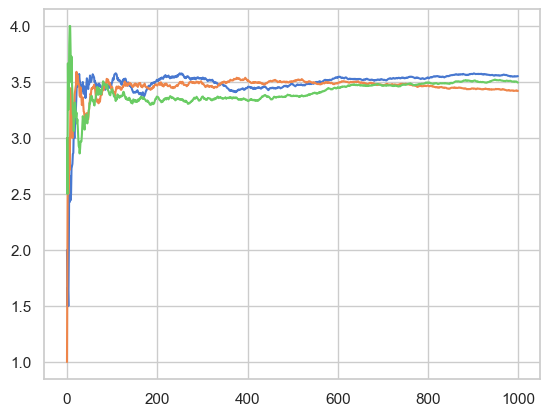

In [20]:
plt.plot(x_mean[1,:]);
plt.plot(x_mean[5,:]);
plt.plot(x_mean[100,:]);

In [31]:
x_mean

array([[2.        , 3.5       , 3.        , ..., 3.35170341, 3.35235235,
        3.352     ],
       [2.        , 1.5       , 1.66666667, ..., 3.5501002 , 3.55255255,
        3.552     ],
       [3.        , 2.5       , 2.33333333, ..., 3.5501002 , 3.54854855,
        3.546     ],
       ...,
       [6.        , 3.5       , 4.33333333, ..., 3.55410822, 3.55155155,
        3.551     ],
       [4.        , 2.5       , 2.33333333, ..., 3.5250501 , 3.52552553,
        3.524     ],
       [2.        , 4.        , 3.33333333, ..., 3.44789579, 3.44644645,
        3.447     ]])

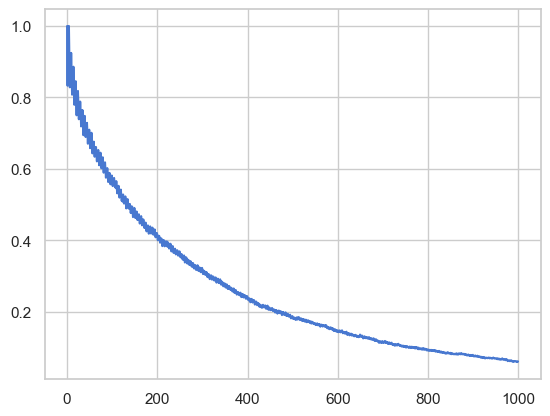

In [30]:
eps = 0.1
prob = np.mean(np.abs(x_mean - 3.5) > eps, axis=0)
plt.plot(prob);

### Упражнение 2 (ЦПТ для равномерного)

Пусть $X \sim U[-1;1]$, пусть $Y = X_1 + \ldots + X_n$ 

* Нарисуем гистограмму для $X_1$, $X_1 + X_2$,  $X_1 + X_2 + X_3$ и $X_1 + X_2 + X_3 + X_4$.
* На последней картинке нарисуем плотность распределения $N(0,1)$ и визуально сравним, насколько сильно оно отличается от гистограммы. 

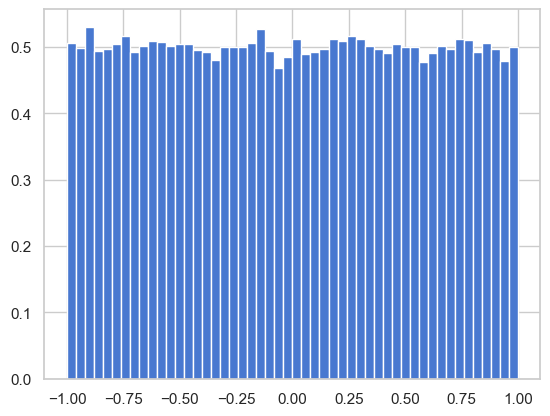

In [37]:
gen = sts.uniform(-1, 2)
x1 = gen.rvs(10**5)
plt.hist(x1, bins=50, density=True);

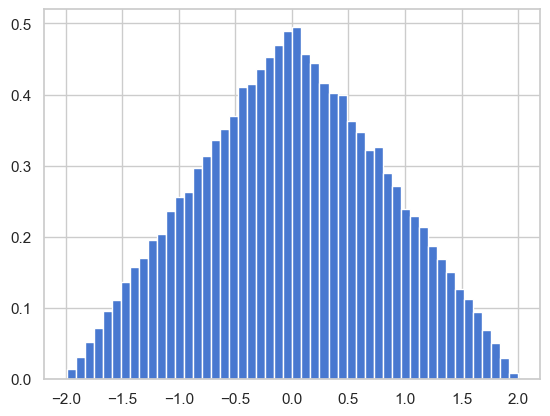

In [38]:
gen = sts.uniform(-1, 2)
x2 = gen.rvs(10**5)
plt.hist(x1 + x2, bins=50, density=True);

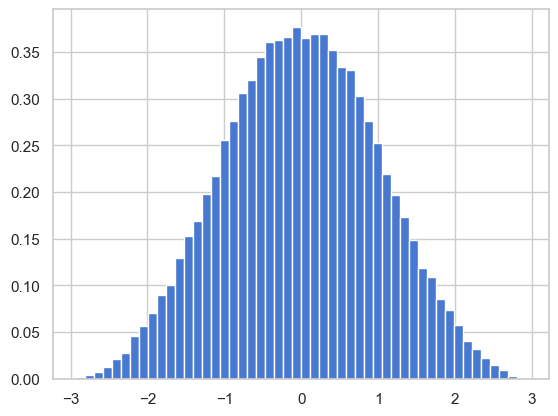

In [39]:
gen = sts.uniform(-1, 2)
x3 = gen.rvs(10**5)
plt.hist(x1 + x2 + x3, bins=50, density=True);

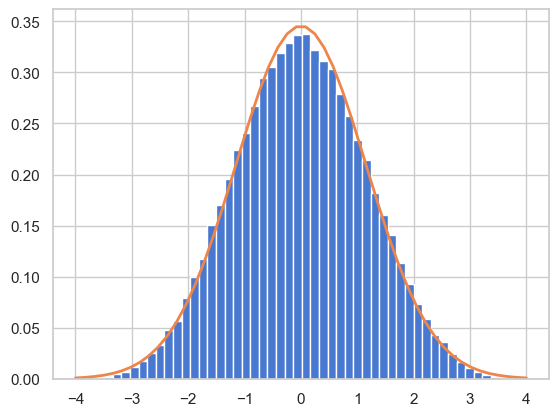

In [43]:
gen = sts.uniform(-1, 2)
x4 = gen.rvs(10**5)
plt.hist(x1 + x2 + x3 + x4, bins=50, density=True)

xq = np.linspace(-4, 4)
yq = sts.norm(loc=0, scale=np.sqrt(4/3)).pdf(xq)

plt.plot(xq, yq, lw=2);

$X_1 \sim U[a;b]$

$Var(X_1) = \frac{(b-a)^2}{12} = 2^2/12 = 1/3$


$Var(X_1 + X_2 + X_3 + X_4) = 4/3$ 